In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# URL da API
api_url = "https://apisidra.ibge.gov.br/values/t/6449/n1/all/v/707/p/all/c12762/117756"

# Baixando os dados
response = requests.get(api_url)
if response.status_code == 200:
    data = response.json()
    print("Dados carregados com sucesso!")
else:
    print(f"Erro ao acessar API: {response.status_code}")
    data = None

# Processando os dados
# Convertendo o JSON para DataFrame
df = pd.DataFrame(data)
    

Dados carregados com sucesso!


In [2]:
import pandas as pd

# Carregar o DataFrame
# Vamos supor que você já tenha o DataFrame carregado com as informações acima.

# Definindo a primeira linha como cabeçalho
df.columns = df.iloc[0]  # Atribuindo a primeira linha como nomes das colunas
df = df.drop(0).reset_index(drop=True)  # Remover a primeira linha que agora é o cabeçalho

# Garantir que a coluna 'Ano' seja numérica
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Converter 'Ano' para datetime
df['Ano'] = pd.to_datetime(df['Ano'], format='%Y', errors='coerce')

# Exibindo o DataFrame para verificação
print(df)


0  Nível Territorial (Código) Nível Territorial Unidade de Medida (Código)  \
0                           1            Brasil                         45   
1                           1            Brasil                         45   
2                           1            Brasil                         45   
3                           1            Brasil                         45   
4                           1            Brasil                         45   
5                           1            Brasil                         45   
6                           1            Brasil                         45   
7                           1            Brasil                         45   
8                           1            Brasil                         45   
9                           1            Brasil                         45   
10                          1            Brasil                         45   
11                          1            Brasil                 

In [3]:
# Filtrando apenas as colunas 'Ano' e 'Valor'
df = df[['Ano', 'Valor']]

# Garantindo que a coluna 'Ano' esteja no formato de ano (YYYY)
df['Ano'] = df['Ano'].dt.year

# Exibindo o DataFrame filtrado
print(df)


0    Ano   Valor
0   2006  659397
1   2007  707501
2   2008  736254
3   2009  725056
4   2010  800474
5   2011  809374
6   2012  855166
7   2013  884642
8   2014  906605
9   2015  875886
10  2016  839466
11  2017  826720
12  2018  848050
13  2019  851906
14  2020  831759
15  2021  867324


In [4]:
# Garantindo que a coluna 'Valor' seja do tipo numérico (float)
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Garantindo que 'Ano' esteja no formato datetime
#df['Ano'] = pd.to_datetime(df['Ano'], format='%Y')

# Ordenando o DataFrame por 'Ano', para garantir a sequência temporal
df = df.sort_values(by='Ano')

# Calculando a diferença entre os valores de 'valor' (apenas a coluna 'Valor')
df['valor_diff'] = df['Valor'].diff().dropna()  # A diferenciação é feita apenas sobre 'Valor'

# Verificando a estacionariedade novamente com o teste ADF (Dickey-Fuller)
from statsmodels.tsa.stattools import adfuller

# Realizando o teste ADF para a série diferenciada
result_diff = adfuller(df['valor_diff'].dropna())  # Testando a série diferenciada

# Exibindo os resultados do teste ADF após a diferenciação
print(f'Estatística ADF após diferenciação: {result_diff[0]}')
print(f'Valor-p após diferenciação: {result_diff[1]}')
print(f'Valor crítico de 1%: {result_diff[4]["1%"]}')
print(f'Valor crítico de 5%: {result_diff[4]["5%"]}')
print(f'Valor crítico de 10%: {result_diff[4]["10%"]}')




Estatística ADF após diferenciação: -4.754378069729996
Valor-p após diferenciação: 6.643616732177804e-05
Valor crítico de 1%: -4.473135048010974
Valor crítico de 5%: -3.28988060356653
Valor crítico de 10%: -2.7723823456790124


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Garantindo que 'Valor' esteja em formato numérico
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Verifique se existem valores nulos e trate-os, por exemplo, removendo-os
df = df.dropna(subset=['Valor'])

# Garantindo que a coluna 'Ano' esteja em formato datetime (se necessário)
#df['Ano'] = pd.to_datetime(df['Ano'], format='%Y')

# Ordenando o DataFrame por 'Ano' para garantir a sequência temporal
df = df.sort_values(by='Ano')

# Ajustando o modelo ARIMA com os parâmetros (1,1,1) - p=1, d=1, q=1
model = ARIMA(df['Valor'], order=(1, 1, 1))

# Ajustando o modelo
model_fit = model.fit()

# Exibindo o resumo do modelo ajustado
print(model_fit.summary())



/home/foxbologna/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Valor   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -174.976
Date:                Thu, 21 Nov 2024   AIC                            355.953
Time:                        07:25:17   BIC                            358.077
Sample:                             0   HQIC                           355.930
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8123      0.203      3.998      0.000       0.414       1.210
ma.L1         -0.7560      0.256     -2.955      0.003      -1.257      -0.255
sigma2      7.714e+08   1.16e-11   6.67e+19      0.0

Previsões: 16    869535.390499
17    871331.651016
18    872790.711209
19    873975.871504
20    874938.549352
Name: predicted_mean, dtype: float64


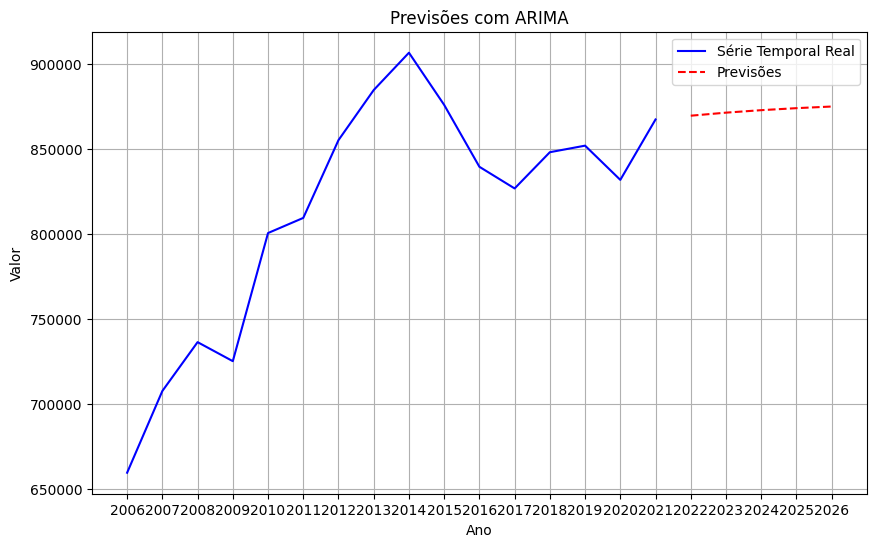

Previsões: 16    869535.390499
17    871331.651016
18    872790.711209
19    873975.871504
20    874938.549352
Name: predicted_mean, dtype: float64


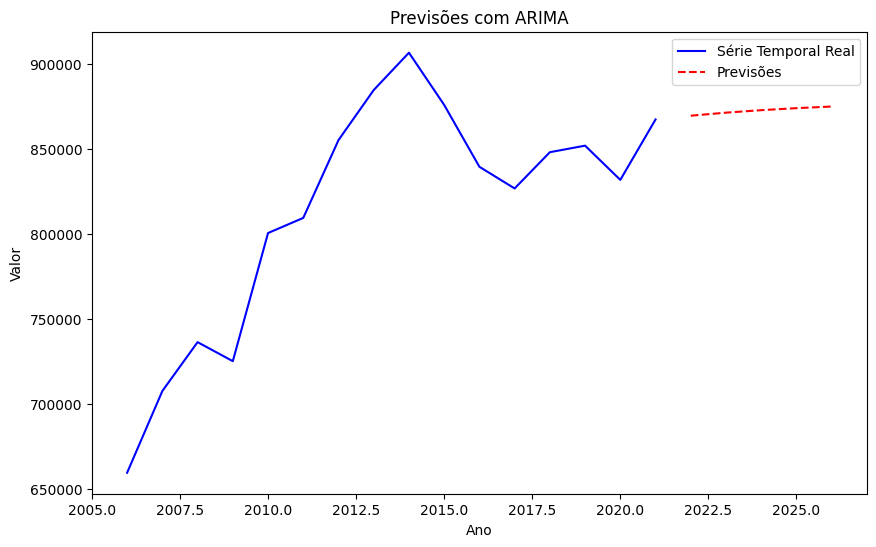

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Previsões para os próximos 5 anos
forecast = model_fit.forecast(steps=5)

# Exibindo as previsões
print("Previsões:", forecast)

# Garantindo que 'ano' seja do tipo inteiro
#df['Ano'] = df['Ano'].astype(int)

# Plotando as previsões
plt.figure(figsize=(10, 6))

# Plotando a série temporal real
plt.plot(df['Ano'], df['Valor'], label='Série Temporal Real', color='blue')

# Gerando os anos para as previsões
anos_futuro = np.arange(df['Ano'].iloc[-1] + 1, df['Ano'].iloc[-1] + 6)

# Plotando as previsões
plt.plot(anos_futuro, forecast, label='Previsões', color='red', linestyle='--')

# Ajustando o eixo X para refletir os anos corretamente
plt.xticks(np.concatenate([df['Ano'], anos_futuro]))  # Combina os anos reais e as previsões
plt.title('Previsões com ARIMA')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Previsões para os próximos 5 anos
forecast = model_fit.forecast(steps=5)

# Exibindo as previsões
print("Previsões:", forecast)

# Garantindo que 'ano' seja do tipo inteiro
df['Ano'] = df['Ano'].astype(int)

# Plotando as previsões
plt.figure(figsize=(10, 6))

# Plotando a série temporal real
plt.plot(df['Ano'], df['Valor'], label='Série Temporal Real', color='blue')

# Gerando os anos para as previsões
anos_futuro = np.arange(df['Ano'].iloc[-1] + 1, df['Ano'].iloc[-1] + 6)

# Plotando as previsões
plt.plot(anos_futuro, forecast, label='Previsões', color='red', linestyle='--')


# Ajustando o eixo X para refletir os anos corretamente
plt.title('Previsões com ARIMA')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.show()


/home/foxbologna/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/foxbologna/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


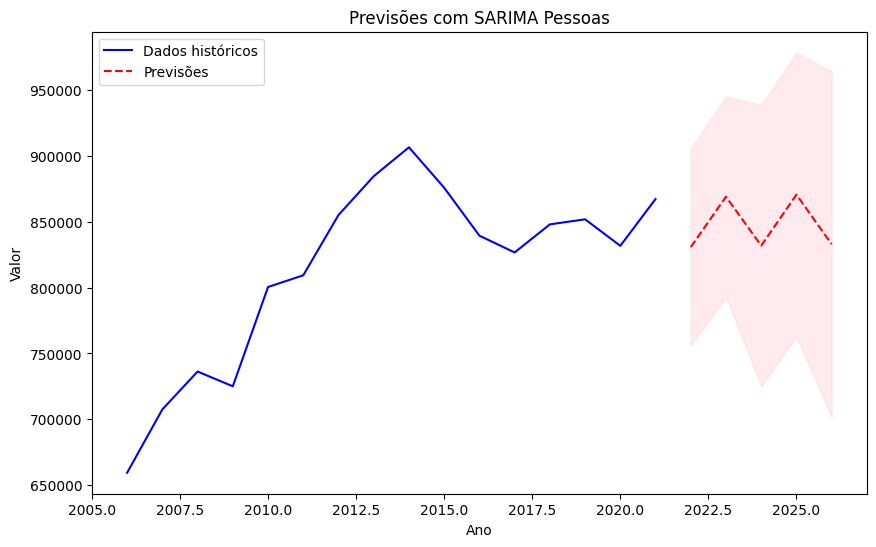

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Ajustando o modelo SARIMA com os melhores parâmetros encontrados
sarima_opt_model = SARIMAX(df['Valor'], 
                           order=(1, 1, 1),  # Ajuste esses valores com base no seu melhor modelo
                           seasonal_order=(1, 1, 1, 12))  # '12' é exemplo; ajuste para a periodicidade dos seus dados
sarima_opt_fit = sarima_opt_model.fit(disp=False)

# Previsões com o modelo ajustado
forecast_steps = 5
forecast = sarima_opt_fit.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()

# Garantindo que os anos futuros para as previsões sejam ajustados
anos_futuro = np.arange(df['Ano'].iloc[-1] + 1, df['Ano'].iloc[-1] + 6)

# Plotando os dados históricos
plt.figure(figsize=(10, 6))
plt.plot(df['Ano'], df['Valor'], label='Dados históricos', color='blue')

# Plotando as previsões com o índice correto para o eixo X
plt.plot(anos_futuro, forecast.predicted_mean, label='Previsões', color='red', linestyle='--')

# Plotando a faixa de confiança das previsões
plt.fill_between(anos_futuro, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)

# Configurando o gráfico
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Previsões com SARIMA Pessoas')
plt.legend()
plt.show()


/home/foxbologna/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/foxbologna/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/foxbologna/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/foxbologna/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Early subset of data for vari

                                     SARIMAX Results                                      
Dep. Variable:                              Valor   No. Observations:                   16
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -34.578
Date:                            Thu, 21 Nov 2024   AIC                             81.156
Time:                                    07:34:32   BIC                             75.748
Sample:                                         0   HQIC                            70.285
                                             - 16                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          2.0677      0.114     18.155      0.000       1.845       2.291
ar.L1         -0.9998      9.785   

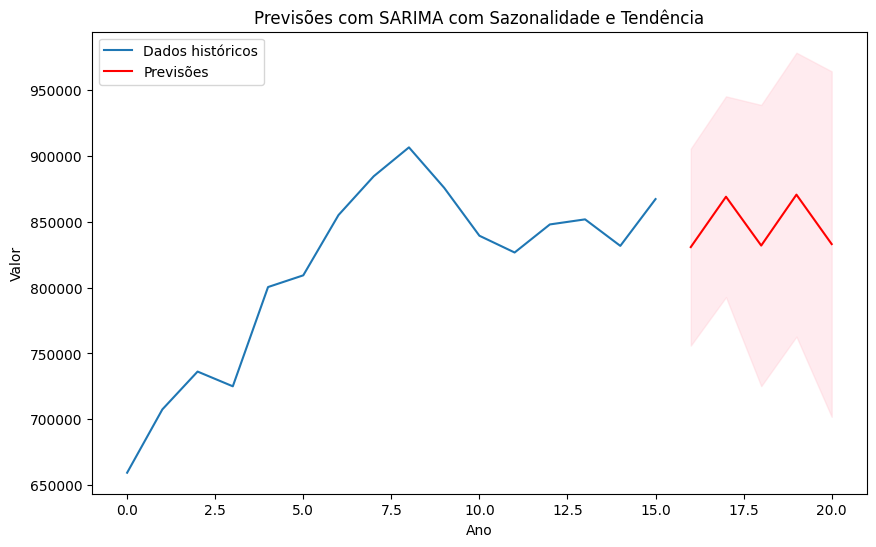

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustando o modelo SARIMA com os parâmetros sazonais e de tendência
sarima_model = SARIMAX(df['Valor'], 
                       order=(1, 1, 1),  # Parâmetros ARIMA padrão (p, d, q)
                       seasonal_order=(1, 1, 1, 12),  # Componentes sazonais (P, D, Q, s)
                       trend='t')  # 't' para tendência linear (se necessário, também pode ser 'c' para constante ou 'ct' para tendência e constante)
                       
sarima_fit = sarima_model.fit(disp=False)

# Exibindo o resumo do modelo ajustado
print(sarima_fit.summary())

# Previsões com o modelo ajustado para os próximos 5 anos
forecast_steps = 5
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_conf_int = forecast.conf_int()

# Plotando as previsões
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Valor'], label='Dados históricos')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Previsões', color='red')
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Previsões com SARIMA com Sazonalidade e Tendência')
plt.legend()
plt.show()
